# Numero de atendentes necessários -> nan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [2]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("data", "df_tabela_ligantes.xlsx")
)
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [3]:
df_duracoes = pd.read_excel(
    os.path.join("data", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

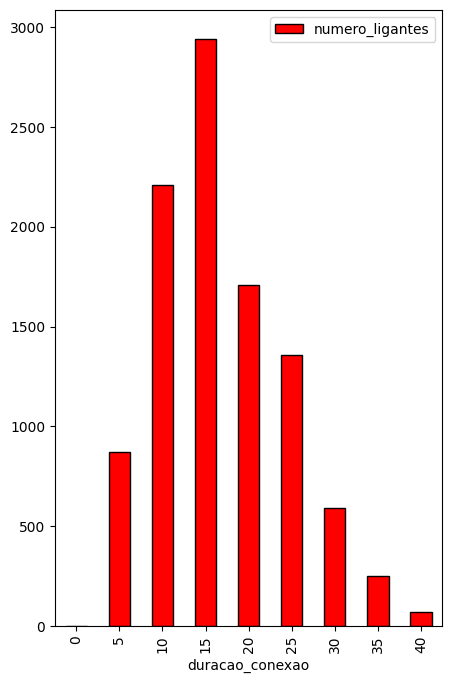

In [4]:
df_duracoes.plot(x = "duracao_conexao",
                 y = "numero_ligantes",
                 kind = "bar",
                 figsize=(5,8),
                 color="red",
                 edgecolor="black")

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

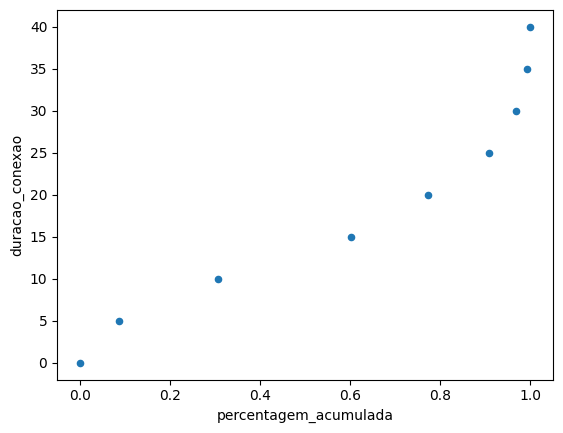

In [6]:
df_duracoes.plot(
    x="percentagem_acumulada",
    y="duracao_conexao",
    kind="scatter"
)

In [7]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)

In [8]:
coefs

array([ 7.25285080e+02, -1.67791097e+03,  1.41326154e+03, -5.23808659e+02,
        1.01010563e+02, -2.06253859e-01])

In [9]:
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)
print(x[::100].round(1))
print(y[::100].round(1))


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-0.2  5.9  7.9  9.3 11.3 13.8 16.  17.6 19.4 24.2]


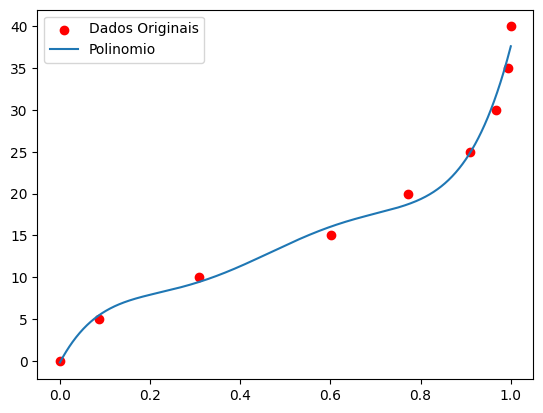

In [13]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")


plt.plot(x,y, label = "Polinomio")
plt.legend()
plt.show()

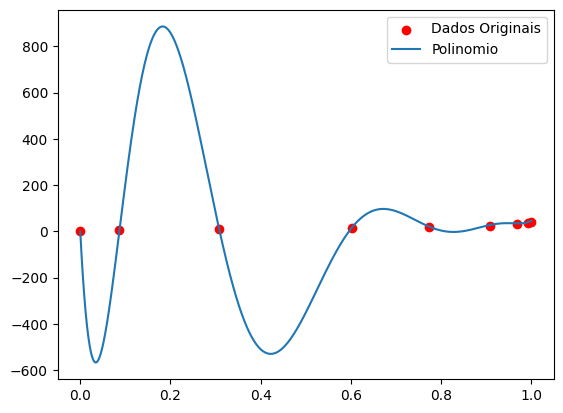

In [14]:
# Apenas para teste!!!!!!!

coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8 # Foi alterado para 8
)

x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")


plt.plot(x,y, label = "Polinomio")
plt.legend()
plt.show()

In [16]:
#Voltando ao Normal !!

coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([ 7.25285080e+02, -1.67791097e+03,  1.41326154e+03, -5.23808659e+02,
        1.01010563e+02, -2.06253859e-01])

In [17]:
np.polyval(coefs, 0)

np.float64(-0.20625385920448025)

In [18]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3, 0.4])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129, 11.309723  ])

In [105]:
tempos_aleatorios = []
for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

np.float64(14.452105460940313)

In [107]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [108]:
qtd_ligacoes = \
    df_tabela_ligantes.loc[0,"numero_medio_ligantes"]
qtd_ligacoes

np.int64(601)

In [110]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0,900, size = qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [112]:
df_duracoes.loc[0,"duracao_conexao"]

np.int64(0)

In [113]:
df_duracoes.iloc[0,0]

np.int64(0)

In [114]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [115]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [117]:
atendentes: list[dict] = []

In [118]:
np.set_printoptions(legacy="1.13")

In [119]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [121]:
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

14.965154868196022

In [123]:
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154868196022}]

In [124]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [125]:
espera_maxima = 10
tempo_descanso = 0

In [126]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611909498971

In [127]:
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True

    else:
        ocupado = True

    if not ocupado:
        
        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim

        atendente["fim"] = atendente["inicio"] + tempo_duracao

else:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }    
    atendentes.append(atendente)
atendentes        

[{'inicio': 0, 'fim': 14.965154868196022},
 {'inicio': 3, 'fim': 14.718611909498971}]

In [128]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [129]:
for momento_ligacao in momentos_ligacoes:
    # print(momento_ligacao) usado apenas para saber qual o print e ver o que está sendo feito!!

0
3
4
4
7
9
11
11
13
13
16
19
23
24
24
25
26
28
29
29
32
32
33
36
36
41
41
42
43
43
44
47
53
53
56
57
58
59
61
63
67
69
70
72
72
73
74
80
80
82
83
84
86
87
87
87
88
89
91
91
93
93
94
94
95
98
99
102
106
106
107
110
111
112
114
115
117
119
120
121
123
126
128
128
128
128
129
129
130
131
134
135
136
136
136
137
138
139
139
143
146
147
147
148
148
148
149
149
151
152
152
153
160
163
164
166
168
169
174
174
174
174
176
177
180
180
182
183
184
189
191
192
195
197
197
197
199
201
201
201
201
203
207
207
209
209
209
209
212
213
216
217
219
221
223
225
226
226
226
227
227
228
228
232
234
237
244
246
248
248
254
256
256
256
257
259
260
265
265
269
273
273
274
274
274
275
276
277
280
280
281
282
284
284
286
287
288
289
290
290
291
291
291
292
292
296
297
300
305
305
307
307
307
314
314
321
322
323
323
323
324
324
324
326
326
327
328
329
335
336
339
340
341
341
343
347
347
348
349
353
355
357
357
359
360
360
365
368
368
369
369
370
371
371
373
373
376
376
377
381
383
383
387
388
392
393
394
396
3

In [134]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.4037564982807},
 {'inicio': 906, 'fim': 917.86945228372167},
 {'inicio': 909, 'fim': 917.37356632866181},
 {'inicio': 900, 'fim': 912.04701461181367},
 {'inicio': 906, 'fim': 913.54143974652425},
 {'inicio': 906, 'fim': 909.2110175449335},
 {'inicio': 907, 'fim': 923.65667308248339},
 {'inicio': 898, 'fim': 910.80468815160725},
 {'inicio': 892, 'fim': 918.91345867401799},
 {'inicio': 892, 'fim': 899.6962495432706},
 {'inicio': 895, 'fim': 921.10612199350487},
 {'inicio': 894, 'fim': 924.69074239242343},
 {'inicio': 894, 'fim': 912.97138604541612},
 {'inicio': 895, 'fim': 911.50408245771962},
 {'inicio': 896, 'fim': 906.24103253233636},
 {'inicio': 896, 'fim': 913.60372669768321},
 {'inicio': 899, 'fim': 917.10414350589645},
 {'inicio': 899, 'fim': 928.75678690002758},
 {'inicio': 899, 'fim': 903.08006092171786},
 {'inicio': 899, 'fim': 906.40232584615558}]

In [135]:
len(atendentes)

20

In [137]:
np.random.permutation([1, 2, 3, 4, 5, 6, 7, 8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [139]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843811921},
 {'inicio': 900, 'fim': 910.89334430853955},
 {'inicio': 899, 'fim': 932.21236755469567},
 {'inicio': 909, 'fim': 917.53861755803973},
 {'inicio': 904, 'fim': 920.23396461861057},
 {'inicio': 899, 'fim': 908.85265704300502},
 {'inicio': 867, 'fim': 894.9962068760093},
 {'inicio': 901, 'fim': 917.66657940193431},
 {'inicio': 907, 'fim': 915.17518229722555},
 {'inicio': 906, 'fim': 913.65133331310551},
 {'inicio': 896, 'fim': 906.82228408233289},
 {'inicio': 892, 'fim': 907.66966275774632},
 {'inicio': 882, 'fim': 901.13837905289324},
 {'inicio': 883, 'fim': 902.83508526014623},
 {'inicio': 814, 'fim': 843.61932082301757},
 {'inicio': 899, 'fim': 907.73089614696869},
 {'inicio': 896, 'fim': 912.80887286644202},
 {'inicio': 906, 'fim': 930.77650856562752},
 {'inicio': 906, 'fim': 914.0496784226475}]

In [140]:
len(atendentes)

19

In [142]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [143]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18
